# Assignment 4 : Neural Networks

In this assignment, you will design an artificial neural network for a binary classification task. We will use Keras for implementing the neural network in this assignment. You can also use numpy, pandas and/or scikit-learn wherever you find them useful. You'll also need matplotlib

#### Import the required libraries here

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


Load the dataset from the file named 'data.csv' . You'll find 7200 datapoints in this file. The first 6 columns are the features (X), while the last column has a binary label (Y) for each feature vector. After loading the dataset, divide it into a training set and a test set (cross-validation set to be more accurate). You can have 70% datapoints in the training set and 30% in the test set. An 80-20 split is also acceptable.

Normalize your training set using mean and variances.

In [3]:
data = np.loadtxt('data.csv', delimiter = ",")
#print(data)

limit = int(0.7*len(data))
train = data[0:limit]
test = data[limit:len(data)]

trainx = train[:, 0:5]
trainy = train[:, 6]

testx = test[:, 0:5]
testy = test[:, 6]

In [4]:
def normalize(train):
    m = len(train)
    n = len(train[0])
    train = train.flatten().reshape(n, m)
    
    for i in range(n):
        std = np.std(train[i])
        mean = np.mean(train[i])
        train[i] -= mean
        train[i] /= std
        
    return train.flatten().reshape(m, n)

ntrainx = normalize(trainx)
ntestx = normalize(testx)
print(ntrainx)

[[ 2.81212594 -0.72010393 -0.65036975 -0.14189137 -0.32591212]
 [ 0.43922679 -0.72179886 -0.57772998 -0.03051038 -0.0789369 ]
 [ 1.5530366  -0.71380849 -0.60678589 -0.22905909 -0.0886222 ]
 ...
 [ 0.91219987 -0.72138051 -0.61717101 -0.12024609 -0.24568345]
 [ 1.39465125 -0.71269638 -0.60752198 -0.30357761 -0.23603442]
 [ 0.96044501 -0.72774886 -0.62199552 -0.10094803 -0.28910407]]


Find the number of positive and negative samples in the training set /test set /the whole dataset. You'll use this result while evaluating your neural network model later.

In [5]:
def numpos(X):
    nump = 0
    X = X.flatten()
    for i in range(len(X)):
        if np.maximum(0, X[i]) == X[i]:
            nump += 1
    
    return nump

train_numpos = numpos(train)
test_numpos = numpos(test)

total_numpos = numpos(data)

print(train_numpos+test_numpos)
print(total_numpos)

50400
50400


#### Define the architecture of the neural network

Initialise a sequential neural network model using keras.models.Sequential(), and add dense layers (dense layer means fully-connected layer) to it using keras.layers.Dense() (you easily how to do this from the internet).

Use ReLU activation function in every layer, except the last one, where you'll use the sigmoid activation function, since it's a binary classification task.

The choice of the number of layers and the number of units in a layer is totally up to you.

In [66]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

#### Training the neural network

1. Compile your nn model using model.compile() . Use the appropriate loss function (binary cross-entropy), and use Adam optimizer. Pass on 'accuracy' as a metric, so that you get to see the accuracy on your training set after every iteration of Adam optimization (a form of mini-batch gradient descent).

Try to look-up and learn a bit about what stochastic gradient descent and mini-batch gradient descent essentilly are. You'll use mini-batches while training your model.

2. Train your model using model.fit() (this will take a while, perhaps a few minutes). Use appropriate number of ephocs and batch size (you have to decide which values work the best). Don't forget that you have to train your model on the training set, and not the test set

In [67]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
mtraining = model.fit(ntrainx, trainy, validation_data = (ntestx, testy), epochs = 150, verbose = 0)

#### Evaluation of the model on the test set

Find the accuracy of your trained model on the test set. Don't forget that you had normalized your training set before training the same model.

Accuracy of the model:  89.49074149131775 %
Precision of the model:  41.943734884262085 %
Recall of the model:  100.0 %


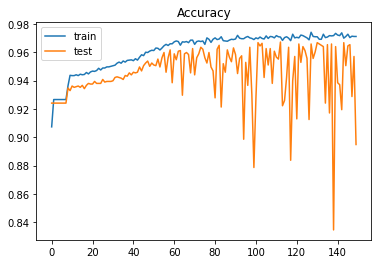

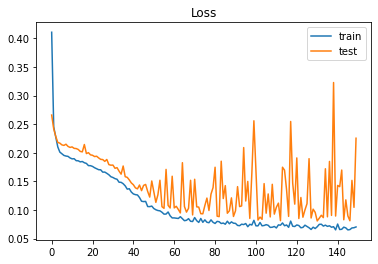

In [68]:
evaluation = model.evaluate(ntestx, testy, verbose = 0)

accuracy = evaluation[1]*100
precision = evaluation[2]*100
recall = evaluation[3]*100

print("Accuracy of the model: ", accuracy, "%")
print("Precision of the model: ", precision, "%")
print("Recall of the model: ", recall, "%")

plt.title("Accuracy")
plt.plot(mtraining.history['accuracy'], label = 'train')
plt.plot(mtraining.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

plt.title("Loss")
plt.plot(mtraining.history['loss'], label = 'train')
plt.plot(mtraining.history['val_loss'], label = 'test')
plt.legend()
plt.show()

Is accuracy really the best metric to evaluate our model on the test set here? What was the proportion of positive samples to negative samples in the dataset? What would have been the accuracy of a model that would have output '0' for any input? By the way, this dataset is for detecting the presence of thyroid in a patient.

Now, find out about the metrics - recall, precision and F1-score. Use these metrics to evaluate your model on the test set

In [69]:
f1_score = 2*recall*precision/(recall + precision)
print(f1_score)

59.09909996163215


Now, tune the hyperparameters of your model (like number of layers, number of units in different layers, etc.) to try and do better and better on the test set.


#### Plotting histograms based on prediction values

Now, you will plot 2 historgrams of prediction values (0 to 1, or 0% to 100%) on the training data, output by your nn model - one histogram for positive samples and another for negative samples. Plot both the histograms in the same figure. 

Here's one such plot I made with my nn model:
<img src="files/index.jpeg">

The blue histogram is for negative samples and the red one is for positive samples (add a legend to the plots, unlike me).

Use log-scale on the y-axis (number of occurances in the given predicted value range), like I have done.

Now, what can you infer from the histograms you got? How should an ideal pair of histograms look like?

In [70]:
prediction = np.hstack((model.predict(ntrainx),model.predict_classes(ntrainx)))
print(prediction)

positives = np.array([])
negatives = np.array([])

for i in range(len(ntrainx)):
    if prediction[i][1] == 1:
        positives = np.append(positives, prediction[i, 0:1])
    else:
        negatives = np.append(negatives, prediction[i, 0:1])

[[3.98567319e-03 0.00000000e+00]
 [7.88385369e-05 0.00000000e+00]
 [1.79966688e-02 0.00000000e+00]
 ...
 [1.38014555e-04 0.00000000e+00]
 [8.03542137e-03 0.00000000e+00]
 [1.25087581e-05 0.00000000e+00]]


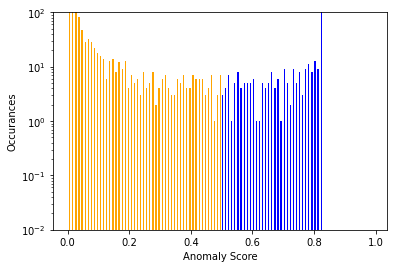

In [71]:
plt.hist([positives, negatives], bins = np.arange(0, 1, 0.01), label = ['Positives', 'Negatives'], color = ['blue', 'orange'])
plt.yscale('log')
plt.ylim([0.01, 100])
plt.ylabel('Occurances')
plt.xlabel('Anomaly Score')
plt.show()